In [0]:
import pandas as pd
import numpy as np

In [0]:
a1=pd.read_csv('xalan-2.4.csv')
a2=pd.read_csv('xalan-2.5.csv')
a3=pd.read_csv('xalan-2.6.csv')
a4=pd.read_csv('xalan-2.7.csv')
b1=pd.read_csv('xerces-1.2.csv')
b2=pd.read_csv('xerces-1.3.csv')
b3=pd.read_csv('xerces-1.4.csv')
c1=pd.read_csv('synapse-1.0.csv')
c2=pd.read_csv('synapse-1.1.csv')
c3=pd.read_csv('synapse-1.2.csv')

In [29]:
ds=[a1,a2,a3,a4,b1,b2,b3,c1,c2,c3]
for g in ds:
  print(g.isnull().sum().sum())
  #print(g.describe())
  g.loc[g['bug'] > 0, 'bug'] = 1
  print(g.shape)
  g=g.drop(columns=['name','name.1','version'],inplace=True)

0
(723, 24)
0
(803, 24)
0
(885, 24)
0
(909, 24)
0
(440, 24)
0
(453, 24)
0
(588, 24)
0
(157, 24)
0
(222, 24)
0
(256, 24)


In [0]:
b2.loc[b2['bug'] > 0, 'bug'] = 1
b3.loc[b3['bug'] > 0, 'bug'] = 1
a1.loc[a1['bug'] > 0, 'bug'] = 1
a2.loc[a2['bug'] > 0, 'bug'] = 1
a3.loc[a3['bug'] > 0, 'bug'] = 1
a4.loc[a4['bug'] > 0, 'bug'] = 1

In [0]:
b1.loc[b1['bug'] > 0, 'bug'] = 1
b1

In [30]:
b2.head()

,wmc,dit,noc,cbo,rfc,lcom,ca,ce,npm,lcom3,...,dam,moa,mfa,cam,ic,cbm,amc,max_cc,avg_cc,bug
0,34,2,0,14,74,0,1,14,21,0.672727,...,1.0,2,0.179487,0.160839,1,3,83.558824,2,1.0588,0
1,46,1,0,13,61,833,11,2,46,0.903704,...,1.0,1,0.000000,0.220497,0,0,11.195652,12,1.6522,0
2,4,1,0,0,4,6,0,0,4,2.000000,...,0.0,0,0.000000,0.750000,0,0,0.000000,1,1.0000,0
3,4,1,0,0,4,6,0,0,4,2.000000,...,0.0,0,0.000000,0.500000,0,0,0.000000,1,1.0000,0
4,41,2,0,11,75,280,2,9,35,0.903947,...,1.0,10,0.487179,0.306620,1,7,28.414634,3,1.1951,0


In [0]:
%matplotlib inline

In [0]:
import seaborn as sns;
import matplotlib.pyplot as plt

In [0]:
def plot_corr(df,size=10):
    '''Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot'''

    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns);
    plt.yticks(range(len(corr.columns)), corr.columns);

<Figure size 720x1152 with 0 Axes>

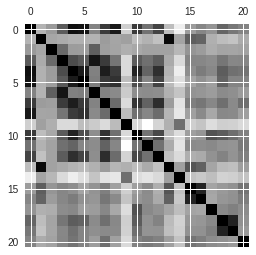

In [34]:
plt.figure(figsize=(10, 16))
plt.matshow(b2.corr())

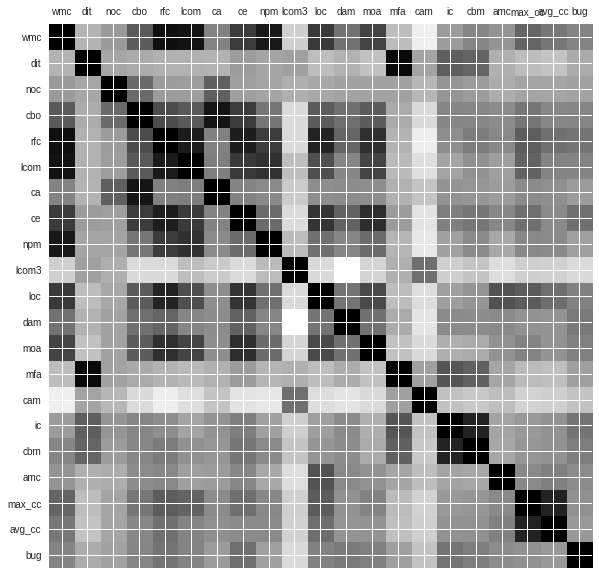

In [35]:
plot_corr(b2)

In [0]:
b2.corr()

In [50]:
a1.shape

(723, 21)

In [53]:
b1.shape

(440, 21)

In [0]:
o=b1.append(a1, ignore_index=True)

In [0]:
o=o.append(c1, ignore_index=True)

In [0]:
otest=c2.append(c3, ignore_index=True)

In [59]:
otest.shape

(478, 21)

In [0]:
o.to_csv("train.csv")

In [60]:
o.shape

(1773, 21)

In [0]:
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier

In [0]:
clf = svm.SVC()

In [0]:
 x=b2.drop(columns=['bug','name','name.1','version'])
 x.head()

,wmc,dit,noc,cbo,rfc,lcom,ca,ce,npm,lcom3,loc,dam,moa,mfa,cam,ic,cbm,amc,max_cc,avg_cc
0,34,2,0,14,74,0,1,14,21,0.672727,2890,1.0,2,0.179487,0.160839,1,3,83.558824,2,1.0588
1,46,1,0,13,61,833,11,2,46,0.903704,579,1.0,1,0.000000,0.220497,0,0,11.195652,12,1.6522
2,4,1,0,0,4,6,0,0,4,2.000000,4,0.0,0,0.000000,0.750000,0,0,0.000000,1,1.0000
3,4,1,0,0,4,6,0,0,4,2.000000,4,0.0,0,0.000000,0.500000,0,0,0.000000,1,1.0000
4,41,2,0,11,75,280,2,9,35,0.903947,1225,1.0,10,0.487179,0.306620,1,7,28.414634,3,1.1951


In [0]:
z=b2['bug']

In [0]:
clf.fit(x,z)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [0]:
x1=a3.drop(columns=['name','bug','name.1','version'])

In [0]:
z1=a3['bug']

In [0]:
j=clf.predict(x1)

In [0]:
clf1 = svm.SVC()
clf1.fit(x1,z1)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [0]:
j2=clf1.predict(x)
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(z,j2)
print(matrix)

[[375   9]
 [ 68   1]]


In [0]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(z1,j)

In [0]:
print(cnf_matrix)

[[474   0]
 [411   0]]


In [0]:
z1

0      1
1      1
2      1
3      1
4      0
5      0
6      1
7      0
8      0
9      0
10     0
11     1
12     1
13     0
14     0
15     1
16     0
17     0
18     0
19     0
20     0
21     0
22     1
23     0
24     0
25     1
26     1
27     0
28     0
29     0
      ..
855    1
856    0
857    1
858    0
859    1
860    0
861    0
862    0
863    1
864    0
865    0
866    0
867    1
868    0
869    1
870    0
871    1
872    1
873    1
874    0
875    1
876    0
877    1
878    0
879    0
880    0
881    1
882    0
883    0
884    1
Name: bug, Length: 885, dtype: int64

In [0]:
j

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

sample_data
xalan-2.4.csv
xalan-2.5.csv
xalan-2.6.csv
xalan-2.7.csv
xerces-1.2.csv
xerces-1.3.csv
xerces-1.4.csv

In [46]:
5+4

9

# Zeroes

In [36]:
a1.describe()

,wmc,dit,noc,cbo,rfc,lcom,ca,ce,npm,lcom3,...,dam,moa,mfa,cam,ic,cbm,amc,max_cc,avg_cc,bug
count,723.000000,723.000000,723.000000,723.000000,723.000000,723.000000,723.000000,723.000000,723.000000,723.000000,...,723.000000,723.000000,723.000000,723.000000,723.000000,723.000000,723.000000,723.000000,723.000000,723.000000
mean,11.449516,2.565698,0.608575,14.497925,30.161826,130.081604,6.746888,8.460581,9.551867,1.116588,...,0.447800,0.907331,0.547803,0.465846,0.919779,3.071923,26.883182,4.376210,1.346579,0.152144
std,16.295102,1.525240,2.608909,19.343618,35.732309,577.039752,16.466312,10.003021,13.925146,0.709978,...,0.472314,1.873711,0.440130,0.258445,1.085887,4.578987,37.427499,6.473221,1.272702,0.359409
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,1.000000,0.000000,4.000000,8.000000,0.000000,1.000000,1.000000,2.000000,0.545833,...,0.000000,0.000000,0.000000,0.270056,0.000000,0.000000,7.166667,1.000000,0.666700,0.000000
50%,6.000000,2.000000,0.000000,8.000000,19.000000,3.000000,2.000000,5.000000,5.000000,0.881720,...,0.051282,0.000000,0.771429,0.400000,1.000000,1.000000,16.000000,2.000000,1.000000,0.000000
75%,12.500000,4.000000,0.000000,18.000000,41.000000,22.500000,5.000000,12.000000,10.000000,2.000000,...,1.000000,1.000000,0.960000,0.600000,2.000000,5.000000,31.174242,6.000000,1.692300,0.000000
max,123.000000,8.000000,29.000000,171.000000,355.000000,6589.000000,155.000000,64.000000,118.000000,2.000000,...,1.000000,18.000000,1.000000,1.000000,5.000000,30.000000,436.000000,86.000000,22.000000,1.000000


In [37]:
a2.describe()

,wmc,dit,noc,cbo,rfc,lcom,ca,ce,npm,lcom3,...,dam,moa,mfa,cam,ic,cbm,amc,max_cc,avg_cc,bug
count,803.000000,803.000000,803.000000,803.000000,803.000000,803.000000,803.000000,803.000000,803.000000,803.000000,...,803.000000,803.000000,803.000000,803.000000,803.000000,803.000000,803.000000,803.000000,803.000000,803.000000
mean,11.323786,2.580324,0.600249,12.855542,29.596513,130.993773,6.105853,7.372354,9.556663,1.122426,...,0.428485,0.841843,0.552368,0.486728,0.845579,3.009963,51.627789,4.244085,1.288384,0.481943
std,16.859172,1.498781,2.504530,18.343401,38.367518,592.644388,15.596614,9.126956,15.020442,0.698142,...,0.471302,1.797378,0.439650,0.276083,1.075024,4.790358,149.752981,7.307817,1.205065,0.499985
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,1.000000,0.000000,3.000000,6.000000,0.000000,0.000000,1.000000,2.000000,0.550000,...,0.000000,0.000000,0.000000,0.274405,0.000000,0.000000,7.000000,1.000000,0.666700,0.000000
50%,5.000000,2.000000,0.000000,7.000000,17.000000,2.000000,1.000000,4.000000,5.000000,0.900000,...,0.000000,0.000000,0.771429,0.416667,0.000000,0.000000,16.000000,2.000000,1.000000,0.000000
75%,11.000000,4.000000,0.000000,15.000000,39.000000,17.000000,4.000000,10.000000,10.000000,2.000000,...,1.000000,1.000000,0.965517,0.666667,2.000000,5.000000,34.941176,5.000000,1.664350,1.000000
max,130.000000,8.000000,29.000000,173.000000,391.000000,7393.000000,156.000000,68.000000,122.000000,2.000000,...,1.000000,16.000000,1.000000,1.000000,5.000000,33.000000,1251.000000,138.000000,20.428600,1.000000


In [38]:
a3.describe()

,wmc,dit,noc,cbo,rfc,lcom,ca,ce,npm,lcom3,...,dam,moa,mfa,cam,ic,cbm,amc,max_cc,avg_cc,bug
count,885.000000,885.000000,885.000000,885.000000,885.000000,885.000000,885.000000,885.000000,885.000000,885.000000,...,885.000000,885.000000,885.000000,885.000000,885.000000,885.000000,885.000000,885.000000,885.000000,885.000000
mean,11.033898,2.511864,0.517514,12.067797,29.287006,123.858757,5.810169,7.003390,8.729944,1.126078,...,0.460189,0.763842,0.547623,0.477524,0.758192,2.776271,63.867773,4.249718,1.297086,0.464407
std,16.210123,1.440025,2.327530,17.841748,37.092447,581.043962,14.961947,9.072545,14.579803,0.672270,...,0.478479,1.763648,0.438362,0.267949,1.059461,4.752435,141.695840,7.127778,1.196709,0.499014
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,1.000000,0.000000,2.000000,7.000000,0.000000,0.000000,1.000000,2.000000,0.552632,...,0.000000,0.000000,0.000000,0.291667,0.000000,0.000000,8.000000,1.000000,0.666700,0.000000
50%,5.000000,3.000000,0.000000,6.000000,17.000000,3.000000,1.000000,4.000000,4.000000,0.912037,...,0.083333,0.000000,0.767123,0.400000,0.000000,0.000000,19.083333,2.000000,1.000000,0.000000
75%,11.000000,3.000000,0.000000,14.000000,38.000000,28.000000,4.000000,10.000000,9.000000,2.000000,...,1.000000,1.000000,0.958333,0.600000,1.000000,5.000000,47.416667,5.000000,1.666700,1.000000
max,133.000000,8.000000,29.000000,168.000000,409.000000,7774.000000,152.000000,68.000000,125.000000,2.000000,...,1.000000,17.000000,1.000000,1.000000,5.000000,33.000000,1251.000000,138.000000,20.428600,1.000000


In [39]:
a4.describe()

,wmc,dit,noc,cbo,rfc,lcom,ca,ce,npm,lcom3,...,dam,moa,mfa,cam,ic,cbm,amc,max_cc,avg_cc,bug
count,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000,...,909.000000,909.000000,909.000000,909.000000,909.000000,909.00000,909.000000,909.000000,909.000000,909.000000
mean,10.874587,2.512651,0.502750,11.991199,29.201320,125.964796,5.761276,6.942794,8.635864,1.203784,...,0.397094,0.739274,0.551156,0.486886,0.735974,2.70077,80.344732,4.547855,1.354488,0.987899
std,16.345381,1.430129,2.297586,17.771058,37.599386,597.082812,14.923491,9.066144,14.529344,0.630734,...,0.446692,1.706172,0.439219,0.273038,1.056047,4.71274,186.135014,7.554149,1.246079,0.109398
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,1.000000,0.000000,2.000000,7.000000,0.000000,0.000000,1.000000,2.000000,0.729167,...,0.000000,0.000000,0.000000,0.300000,0.000000,0.00000,8.111111,1.000000,0.666700,1.000000
50%,5.000000,3.000000,0.000000,6.000000,17.000000,3.000000,1.000000,4.000000,4.000000,1.000000,...,0.000000,0.000000,0.789474,0.400000,0.000000,0.00000,19.807018,2.000000,1.000000,1.000000
75%,11.000000,3.000000,0.000000,14.000000,38.000000,27.000000,4.000000,9.000000,9.000000,2.000000,...,1.000000,1.000000,0.962406,0.625000,1.000000,4.00000,51.750000,5.000000,1.666700,1.000000
max,138.000000,8.000000,29.000000,172.000000,428.000000,8413.000000,156.000000,67.000000,130.000000,2.000000,...,1.000000,17.000000,1.000000,1.000000,5.000000,33.00000,1875.000000,143.000000,21.142900,1.000000


In [40]:
b1.describe()

,wmc,dit,noc,cbo,rfc,lcom,ca,ce,npm,lcom3,...,dam,moa,mfa,cam,ic,cbm,amc,max_cc,avg_cc,bug
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,...,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,11.281818,2.047727,0.456818,4.868182,21.234091,90.993182,2.522727,2.677273,8.790909,1.485295,...,0.254597,0.777273,0.364387,0.508085,0.356818,1.413636,21.694662,3.363636,1.222279,0.161364
std,12.916329,1.310547,3.156214,8.064709,30.791861,233.773487,6.715801,4.379017,9.190562,0.650863,...,0.403697,2.731814,0.428695,0.244055,0.673243,3.079330,59.346027,8.814957,1.173059,0.368285
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,1.000000,0.000000,0.000000,5.000000,1.000000,0.000000,0.000000,2.000000,0.842375,...,0.000000,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000,1.000000,0.824975,0.000000
50%,7.000000,1.000000,0.000000,2.000000,12.000000,10.000000,1.000000,1.000000,6.000000,2.000000,...,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,4.666667,1.000000,1.000000,0.000000
75%,14.000000,4.000000,0.000000,6.000000,23.000000,55.000000,2.000000,3.000000,11.250000,2.000000,...,0.500000,0.000000,0.873768,0.666667,1.000000,1.000000,19.773611,2.000000,1.093175,0.000000
max,86.000000,6.000000,52.000000,59.000000,255.000000,1993.000000,55.000000,44.000000,51.000000,2.000000,...,1.000000,38.000000,1.000000,1.000000,4.000000,22.000000,779.800000,147.000000,13.358500,1.000000


In [41]:
b2.describe()

,wmc,dit,noc,cbo,rfc,lcom,ca,ce,npm,lcom3,...,dam,moa,mfa,cam,ic,cbm,amc,max_cc,avg_cc,bug
count,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,...,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000
mean,11.377483,2.008830,0.454746,5.075055,21.704194,94.523179,2.666667,2.754967,8.814570,1.465238,...,0.264632,0.803532,0.357340,0.503663,0.346578,1.375276,21.964005,3.452539,1.236002,0.152318
std,13.348333,1.276025,3.139219,8.389238,32.462993,250.156654,6.838314,4.740104,9.203504,0.657025,...,0.409421,2.803093,0.424897,0.240612,0.659490,3.088017,58.898383,8.770454,1.180637,0.359726
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,1.000000,0.000000,0.000000,5.000000,1.000000,0.000000,0.000000,2.000000,0.833333,...,0.000000,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000,1.000000,0.833300,0.000000
50%,7.000000,1.000000,0.000000,2.000000,12.000000,10.000000,1.000000,2.000000,6.000000,2.000000,...,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,4.666667,1.000000,1.000000,0.000000
75%,14.000000,3.000000,0.000000,6.000000,24.000000,55.000000,2.000000,3.000000,11.000000,2.000000,...,0.600000,0.000000,0.870370,0.666667,1.000000,1.000000,21.100000,3.000000,1.130400,0.000000
max,95.000000,5.000000,52.000000,60.000000,297.000000,2425.000000,57.000000,55.000000,55.000000,2.000000,...,1.000000,41.000000,1.000000,1.000000,4.000000,25.000000,779.800000,147.000000,13.358500,1.000000


In [42]:
b3.describe()

,wmc,dit,noc,cbo,rfc,lcom,ca,ce,npm,lcom3,...,dam,moa,mfa,cam,ic,cbm,amc,max_cc,avg_cc,bug
count,588.000000,588.000000,588.000000,588.000000,588.000000,588.000000,588.000000,588.000000,588.000000,588.000000,...,588.000000,588.000000,588.000000,588.000000,588.000000,588.000000,588.000000,588.000000,588.000000,588.000000
mean,9.943878,1.972789,0.426871,6.312925,19.241497,75.488095,3.348639,3.268707,7.899660,1.469420,...,0.260953,0.738095,0.343288,0.515248,0.379252,1.433673,17.473411,3.811224,1.403360,0.743197
std,11.047300,1.278551,2.772417,9.118977,25.798317,213.539016,7.178371,5.422137,8.517252,0.654702,...,0.408244,2.508475,0.423354,0.250184,0.722511,3.126633,32.998726,9.311937,1.787752,0.437242
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,1.000000,0.000000,1.000000,4.750000,1.000000,0.000000,0.000000,2.000000,0.882273,...,0.000000,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000,1.000000,0.857100,0.000000
50%,6.000000,1.000000,0.000000,3.000000,12.000000,10.000000,1.000000,2.000000,5.000000,2.000000,...,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,5.000000,1.000000,1.000000,1.000000
75%,13.000000,3.000000,0.000000,8.000000,21.000000,51.000000,3.000000,4.000000,10.000000,2.000000,...,0.514785,0.000000,0.852431,0.666667,1.000000,1.000000,19.471154,3.000000,1.134700,1.000000
max,78.000000,5.000000,52.000000,60.000000,230.000000,2643.000000,55.000000,47.000000,50.000000,2.000000,...,1.000000,25.000000,1.000000,1.000000,4.000000,21.000000,341.416667,147.000000,21.000000,1.000000


In [43]:
c1.describe()

,wmc,dit,noc,cbo,rfc,lcom,ca,ce,npm,lcom3,...,dam,moa,mfa,cam,ic,cbm,amc,max_cc,avg_cc,bug
count,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,...,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000
mean,8.070064,1.585987,0.375796,13.184713,29.834395,39.019108,4.324841,9.050955,5.789809,0.992422,...,0.557888,0.280255,0.213664,0.423480,0.273885,0.407643,22.772534,6.515924,1.737339,0.101911
std,8.286624,0.800998,1.788188,10.454309,24.237830,142.075705,9.935185,6.579685,7.900042,0.520978,...,0.343786,0.658615,0.289999,0.203160,0.573020,0.831707,19.241846,6.783847,1.136946,0.303499
min,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000,1.000000,0.000000,8.000000,13.000000,4.000000,1.000000,4.000000,2.000000,0.750000,...,0.333333,0.000000,0.000000,0.288889,0.000000,0.000000,9.166667,1.000000,1.000000,0.000000
50%,6.000000,1.000000,0.000000,11.000000,26.000000,8.000000,2.000000,9.000000,3.000000,0.833333,...,0.666667,0.000000,0.000000,0.400000,0.000000,0.000000,19.500000,5.000000,1.500000,0.000000
75%,9.000000,2.000000,0.000000,14.000000,38.000000,20.000000,4.000000,12.000000,6.000000,0.928571,...,0.800000,0.000000,0.428571,0.500000,0.000000,0.000000,29.933333,8.000000,2.166700,0.000000
max,60.000000,5.000000,11.000000,88.000000,147.000000,1269.000000,88.000000,37.000000,56.000000,2.000000,...,1.000000,4.000000,1.000000,1.000000,3.000000,4.000000,102.400000,39.000000,7.000000,1.000000


In [44]:
c2.describe()

,wmc,dit,noc,cbo,rfc,lcom,ca,ce,npm,lcom3,...,dam,moa,mfa,cam,ic,cbm,amc,max_cc,avg_cc,bug
count,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,...,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000
mean,7.333333,1.603604,0.378378,12.504505,28.603604,34.810811,4.099099,8.599099,5.918919,1.095273,...,0.608633,0.261261,0.290740,0.498684,0.112613,0.225225,27.241800,7.135135,2.050472,0.270270
std,8.279980,0.799086,2.133779,10.867257,24.573016,130.749528,9.698118,6.626875,7.840186,0.677644,...,0.474170,0.619615,0.357351,0.217898,0.415670,0.858123,24.993113,7.574650,1.556553,0.445103
min,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.097917,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,1.000000,0.000000,7.000000,12.000000,1.000000,0.000000,4.000000,2.250000,0.625000,...,0.000000,0.000000,0.000000,0.305398,0.000000,0.000000,8.812500,1.000000,1.000000,0.000000
50%,4.500000,1.000000,0.000000,10.000000,24.000000,3.000000,2.000000,8.000000,3.000000,0.816498,...,1.000000,0.000000,0.000000,0.500000,0.000000,0.000000,23.291667,5.000000,1.625000,0.000000
75%,8.000000,2.000000,0.000000,14.000000,36.000000,13.750000,4.000000,11.000000,6.000000,2.000000,...,1.000000,0.000000,0.650000,0.666667,0.000000,0.000000,38.000000,10.000000,2.812475,1.000000
max,61.000000,5.000000,17.000000,82.000000,154.000000,1172.000000,82.000000,38.000000,58.000000,2.000000,...,1.000000,4.000000,1.000000,1.000000,3.000000,6.000000,187.500000,39.000000,12.500000,1.000000


In [45]:
c3.describe()

,wmc,dit,noc,cbo,rfc,lcom,ca,ce,npm,lcom3,...,dam,moa,mfa,cam,ic,cbm,amc,max_cc,avg_cc,bug
count,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,...,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000
mean,7.621094,1.640625,0.410156,12.753906,29.527344,41.085938,4.253906,8.722656,6.097656,1.109507,...,0.612997,0.382812,0.319106,0.497817,0.203125,0.410156,28.207580,7.816406,2.141574,0.335938
std,9.109841,0.784501,2.187248,11.742581,25.833085,175.818959,10.110855,6.870599,8.699010,0.668497,...,0.470698,0.855167,0.364249,0.219158,0.536647,1.147775,26.696273,8.777058,1.742179,0.473242
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,1.000000,0.000000,7.000000,12.000000,1.000000,0.000000,4.000000,2.000000,0.666667,...,0.000000,0.000000,0.000000,0.314683,0.000000,0.000000,8.916667,1.000000,1.000000,0.000000
50%,4.000000,1.000000,0.000000,10.000000,23.000000,3.000000,2.000000,8.000000,3.000000,0.829870,...,1.000000,0.000000,0.000000,0.500000,0.000000,0.000000,23.291667,5.000000,1.648150,0.000000
75%,8.000000,2.000000,0.000000,14.000000,38.250000,11.250000,4.000000,11.250000,6.000000,2.000000,...,1.000000,0.000000,0.688702,0.666667,0.000000,0.000000,37.753676,11.000000,3.000000,1.000000
max,67.000000,5.000000,19.000000,83.000000,172.000000,1931.000000,83.000000,37.000000,61.000000,2.000000,...,1.000000,6.000000,1.000000,1.000000,3.000000,7.000000,185.500000,50.000000,12.500000,1.000000
